In [1]:
%matplotlib inline
import sys
sys.path.append('../../rbm10/')
sys.path.append('../utilities/')
from common_imports import * # The number of CPU cores used can be changed in this file.
import dataset_utils, plots_utils,  RBM_utils, evaluate_learning_utils
import rbm10

In [3]:
dataset_utils.load_mixture_model(globals(),path = '../data/',N=500,M=2,n_c=1,nature='Spin')

In [7]:
RBM = rbm10.RBM(n_v=500,n_h=5,visible='Spin',hidden='Spin')
RBM.fit(train_data,MoI=2,adapt_PT=True, n_iter=100,verbose=0,vverbose=1)

Fitting MOI first
Fitting MOI done
Starting epoch 1
Starting epoch 2
AR = 0.000, Increasing N_PT to 3
Starting epoch 3
Starting epoch 4
AR = 0.674, Decreasing N_PT to 2
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting

{}

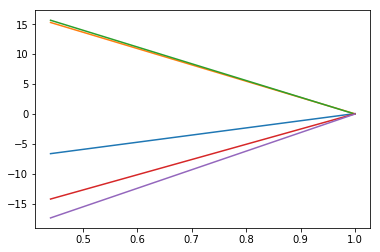

In [35]:
plt.plot(RBM.betas[:-1],RBM.zlayer._fields[:,0,0,:]);

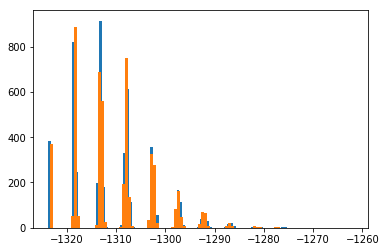

In [46]:
def mean_zlayer(self,x):
    if x.ndim ==1: x = x[np.newaxis,:]
    if self.from_MoI:
        return self.zlayer.mean_from_inputs(None, self.vlayer.compute_output(x,self.weights_MoI, direction = 'up'), beta=0)[:,0]
    elif self.from_MoI_h:
        return self.zlayer.mean_from_inputs(None, self.hlayer.compute_output(x,self.weights_MoI, direction = 'up'), beta=0)[:,0]
    else:
        print('No zlayer')
        return
    

color = np.argmax(mean_zlayer(RBM,train_data),axis=-1)
for c in range(RBM.zlayer.n_c):
    plt.hist(RBM.free_energy(train_data[color==c]),bins=100);

In [47]:
RBM = rbm10.RBM(n_v=500,n_h=5,visible='Spin',hidden='Spin')
RBM.fit(train_data,MoI_h=5,adapt_PT=True, n_iter=50,verbose=0,vverbose=1)

Starting epoch 1
Reloading mixture 4, 3.54e-03
Reloading mixture 3, 3.64e-03
Reloading mixture 0, 3.95e-03
Starting epoch 2
AR = 0.165, Increasing N_PT to 3
Reloading mixture 2, 3.81e-03
Reloading mixture 0, 3.54e-03
Starting epoch 3
AR = 0.652, Decreasing N_PT to 2
Reloading mixture 1, 3.70e-03
Starting epoch 4
Reloading mixture 1, 3.89e-03
Reloading mixture 4, 3.65e-03
Starting epoch 5
Reloading mixture 3, 3.98e-03
Starting epoch 6
Starting epoch 7
Reloading mixture 2, 3.92e-03
Reloading mixture 3, 3.92e-03
Starting epoch 8
Starting epoch 9
Starting epoch 10
Reloading mixture 0, 3.86e-03
Reloading mixture 3, 3.82e-03
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Reloading mixture 4, 3.90e-03
Reloading mixture 3, 3.90e-03
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Startin

{}

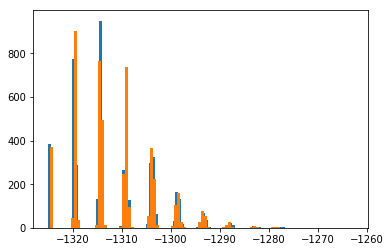

In [51]:
color = np.argmax(np.dot(train_data,MoI.cond_muv.T),axis=-1)
for c in range(MoI.M):
    plt.hist(RBM.free_energy(train_data[color==c]),bins=100);

In [13]:
import rbm10
importlib.reload(rbm10)
RBM = rbm10.RBM(n_v=500,n_h=2,visible='Spin',hidden='Gaussian')
results = RBM.fit(train_data,MoI_h=5,adapt_PT=False,N_PT=2, n_iter=200,verbose=0,vverbose=1,record=['h_gamma','h_gamma0','weights_MoI'],record_interval=10)

Starting epoch 1
Starting epoch 2
Reloading mixture 3, 3.87e-03
Starting epoch 3
Starting epoch 4
Starting epoch 5
Reloading mixture 3, 3.64e-03
Reloading mixture 1, 3.54e-03
Starting epoch 6
Reloading mixture 2, 3.98e-03
Reloading mixture 1, 3.66e-03
Starting epoch 7
Reloading mixture 1, 3.49e-03
Reloading mixture 4, 3.21e-03
Reloading mixture 4, 3.84e-03
Reloading mixture 2, 3.40e-03
Starting epoch 8
Starting epoch 9
Reloading mixture 0, 3.82e-03
Reloading mixture 2, 3.56e-03
Reloading mixture 1, 3.73e-03
Reloading mixture 2, 3.18e-03
Starting epoch 10
Reloading mixture 2, 3.81e-03
Reloading mixture 1, 3.67e-03
Starting epoch 11
Reloading mixture 0, 3.40e-03
Reloading mixture 1, 2.96e-03
Reloading mixture 1, 3.65e-03
Reloading mixture 2, 3.24e-03
Starting epoch 12
Reloading mixture 2, 3.65e-03
Reloading mixture 0, 3.21e-03
Starting epoch 13
Reloading mixture 3, 3.70e-03
Reloading mixture 0, 3.31e-03
Starting epoch 14
Reloading mixture 3, 3.90e-03
Reloading mixture 0, 3.70e-03
Reloadi

[0.43974918]


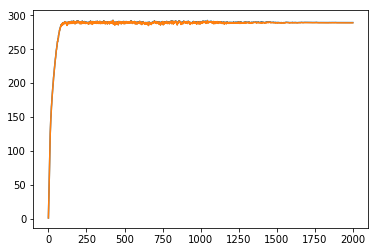

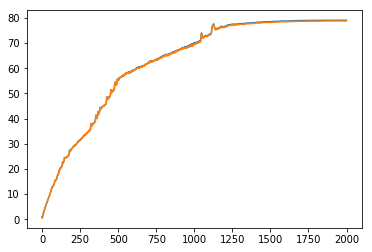

/Users/jerometubiana/anaconda/envs/python3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


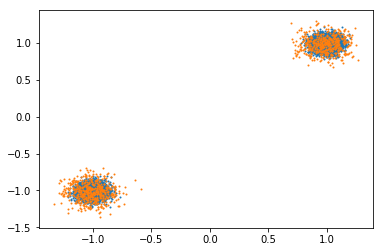

In [16]:
%matplotlib inline
print(RBM.mav_acceptance_rates)
plt.plot(results['h_gamma']); plt.show()
plt.plot(results['h_gamma0']); plt.show()


h = RBM.sample_hiddens(train_data)

z0 = RBM.zlayer.sample_from_inputs(np.zeros([1000,1,5],dtype=np.float32),I0=None,beta=1)
h2 = RBM.hlayer.sample_from_inputs(None,I0= RBM.zlayer.compute_output(z0,RBM.weights_MoI,direction='down'), beta=0)

fig, ax = plt.subplots()
plt.scatter(h[:,0],h[:,1],s=1)
plt.scatter(h2[:,0],h2[:,1],s=1)
fig.show()

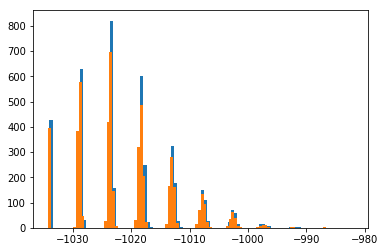

In [17]:
color = np.argmax(np.dot(train_data,MoI.cond_muv.T),axis=-1)
for c in range(MoI.M):
    plt.hist(RBM.free_energy(train_data[color==c]),bins=100);

In [21]:
import rbm10
importlib.reload(rbm10)
RBM = rbm10.RBM(n_v=500,n_h=2,visible='Spin',hidden='dReLU')
results = RBM.fit(train_data,MoI_h=5,adapt_PT=False,N_PT=2, n_iter=200,verbose=0,vverbose=1,record=['h_gamma','h_gamma_plus0','h_gamma_minus0','weights_MoI'],record_interval=10)

Starting epoch 1
Reloading mixture 1, 3.77e-03
Starting epoch 2


../../rbm10/layer10.py:1038: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1/(1+ (etg_minus/np.sqrt(self._gamma_minus))/(etg_plus/np.sqrt(self._gamma_plus)) )
../../rbm10/layer10.py:1072: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1/(1+ (etg_minus/np.sqrt(self._gamma_minus))/(etg_plus/np.sqrt(self._gamma_plus)) )


Reloading mixture 4, 3.66e-03
Starting epoch 3
Reloading mixture 3, 3.98e-03
Starting epoch 4
Starting epoch 5
Reloading mixture 3, 3.73e-03
Reloading mixture 1, 3.48e-03
Starting epoch 6
Starting epoch 7
Reloading mixture 4, 3.66e-03
Reloading mixture 1, 3.40e-03
Starting epoch 8
Starting epoch 9
Reloading mixture 0, 3.90e-03
Reloading mixture 1, 3.96e-03
Starting epoch 10
Starting epoch 11
Reloading mixture 1, 3.98e-03
Reloading mixture 2, 3.77e-03
Starting epoch 12
Reloading mixture 2, 3.69e-03
Reloading mixture 0, 3.72e-03
Starting epoch 13
Reloading mixture 1, 3.82e-03
Reloading mixture 0, 3.78e-03
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Reloading mixture 0, 3.87e-03
Reloading mixture 1, 3.57e-03
Starting epoch 20
Reloading mixture 1, 3.91e-03
Reloading mixture 3, 3.84e-03
Starting epoch 21
Reloading mixture 3, 3.87e-03
Reloading mixture 0, 3.59e-03
Starting epoch 22
Reloading mixture 0, 3.94e-03
Reloading mixture

[0.38044566]


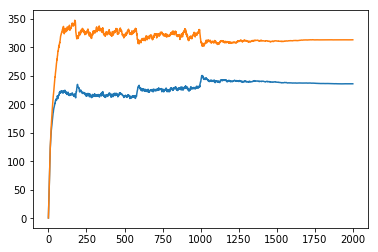

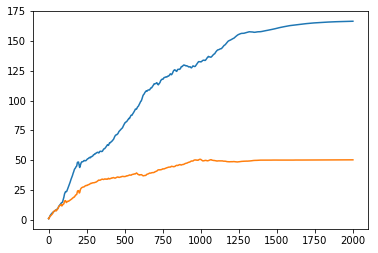

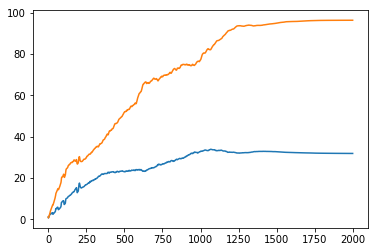

/Users/jerometubiana/anaconda/envs/python3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


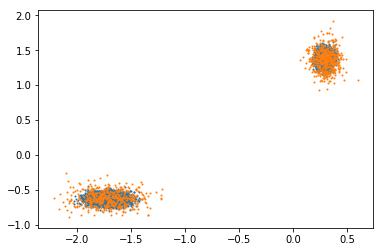

In [22]:
%matplotlib inline
print(RBM.mav_acceptance_rates)
plt.plot(results['h_gamma']); plt.show()
plt.plot(results['h_gamma_plus0']); plt.show()
plt.plot(results['h_gamma_minus0']); plt.show()


h = RBM.sample_hiddens(train_data)

z0 = RBM.zlayer.sample_from_inputs(np.zeros([1000,1,5],dtype=np.float32),I0=None,beta=1)
h2 = RBM.hlayer.sample_from_inputs(None,I0= RBM.zlayer.compute_output(z0,RBM.weights_MoI,direction='down'), beta=0)

fig, ax = plt.subplots()
plt.scatter(h[:,0],h[:,1],s=1)
plt.scatter(h2[:,0],h2[:,1],s=1)
fig.show()

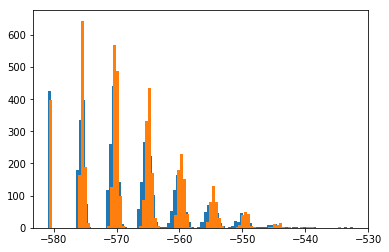

In [23]:
color = np.argmax(np.dot(train_data,MoI.cond_muv.T),axis=-1)
for c in range(MoI.M):
    plt.hist(RBM.free_energy(train_data[color==c]),bins=100);

In [10]:
import copy
RBM = rbm10.RBM(n_v=500,n_h=5,visible='Spin',hidden='Spin')
RBM._only_sampling = False
RBM.fit(train_data, n_iter=50,verbose=0,vverbose=1)
RBM_ = copy.deepcopy(RBM)
RBM_._only_sampling = True
RBM_.fit(train_data,MoI_h=10,n_iter=50,init='previous',batch_norm=False)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Iteration number 0, pseudo-likelihood: -0.11
Starting epoch 1
Mismatch dimensions (100, 500), [2, 100, 500], 

{}

In [11]:
dataset_utils.load_mixture_model(globals(),path = '../data/',N=10,M=5,n_c=1,nature='Spin')
print('hi')
RBM = rbm10.RBM(n_v=10,n_h=5,visible='Spin',hidden='Spin',interpolate=False)
RBM.fit(train_data,MoI_h=5,adapt_PT=True)

datav,datah, dataz = RBM.gen_data(MoI_h=RBM.from_MoI_h,
                                  MoI=RBM.from_MoI,
                                  N_PT = len(RBM.betas))


hi
Iteration number 0, pseudo-likelihood: -0.46
Starting epoch 1
[RBM] Iteration 1, time = 0.52s, pseudo-likelihood = -0.22, AR = 0.780
Starting epoch 2
[RBM] Iteration 2, time = 0.58s, pseudo-likelihood = -0.13, AR = 0.812
Starting epoch 3
[RBM] Iteration 3, time = 0.42s, pseudo-likelihood = -0.09, AR = 0.867
Starting epoch 4
[RBM] Iteration 4, time = 0.62s, pseudo-likelihood = -0.07, AR = 0.892
Starting epoch 5
[RBM] Iteration 5, time = 0.43s, pseudo-likelihood = -0.06, AR = 0.902
Starting epoch 6
[RBM] Iteration 6, time = 0.52s, pseudo-likelihood = -0.06, AR = 0.909
Starting epoch 7
[RBM] Iteration 7, time = 0.56s, pseudo-likelihood = -0.06, AR = 0.946
Starting epoch 8
[RBM] Iteration 8, time = 0.40s, pseudo-likelihood = -0.06, AR = 0.946
Starting epoch 9
[RBM] Iteration 9, time = 0.46s, pseudo-likelihood = -0.06, AR = 0.963
Starting epoch 10
[RBM] Iteration 10, time = 0.42s, pseudo-likelihood = -0.06, AR = 0.958
Mismatch dimensions (2, 100, 10), [2, 10, 10], reinitializating I
Mism

In [7]:
RBM.from_MoI_h = bool(True)